In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('yellow_tripdata_2019-01.csv')
df1 = pd.read_csv('green_tripdata_2019-01.csv')
df2 = pd.read_csv('fhv_tripdata_2019-01.csv')

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [6]:
df1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2018-12-21 15:17:29,2018-12-21 15:18:57,N,1,264,264,5,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2,1,NaN
1,2,2019-01-01 00:10:16,2019-01-01 00:16:32,N,1,97,49,2,0.86,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1,NaN
2,2,2019-01-01 00:27:11,2019-01-01 00:31:38,N,1,49,189,2,0.66,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,1,1,NaN
3,2,2019-01-01 00:46:20,2019-01-01 01:04:54,N,1,189,17,2,2.68,13.5,0.5,0.5,2.96,0.0,NaN,0.3,19.71,1,1,NaN
4,2,2019-01-01 00:19:06,2019-01-01 00:39:43,N,1,82,258,1,4.53,18.0,0.5,0.5,0.00,0.0,NaN,0.3,19.30,2,1,NaN


In [11]:
df2.head()

,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,B00001,2019-01-01 00:30:00,2019-01-01 02:51:55,NaN,NaN,NaN
1,B00001,2019-01-01 00:45:00,2019-01-01 00:54:49,NaN,NaN,NaN
2,B00001,2019-01-01 00:15:00,2019-01-01 00:54:52,NaN,NaN,NaN
3,B00008,2019-01-01 00:19:00,2019-01-01 00:39:00,NaN,NaN,NaN
4,B00008,2019-01-01 00:27:00,2019-01-01 00:37:00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
print("Training data has {} rows & {} columns".format(df.shape[0],df.shape[1]))

Training data has 7667792 rows & 18 columns


In [7]:
print("Training data has {} rows & {} columns".format(df1.shape[0],df1.shape[1]))

Training data has 630918 rows & 20 columns


In [13]:
print("Training data has {} rows & {} columns".format(df2.shape[0],df2.shape[1]))

Training data has 23130810 rows & 6 columns


In [7]:
df.isnull().sum().sum()

4855978

In [9]:
df1.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag            0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
passenger_count               0
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                630918
improvement_surcharge         0
total_amount                  0
payment_type                  0
trip_type                     0
congestion_surcharge     546380
dtype: int64

In [14]:
df2.isnull().sum()

dispatching_base_num           3
pickup_datetime                0
dropoff_datetime               0
PULocationID             1818836
DOLocationID              664275
SR_Flag                 17747181
dtype: int64

In [31]:
#dropping 'congestion_surcharge' as the whole column contains null values for df
del df['congestion_surcharge']

In [9]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,7667792.0,1.636775,0.539820,1.0,1.00,2.00,2.00,4.00
passenger_count,7667792.0,1.567078,1.224431,0.0,1.00,1.00,2.00,9.00
trip_distance,7667792.0,2.801084,3.737529,0.0,0.90,1.53,2.80,831.80
RatecodeID,7667792.0,1.058371,0.678089,1.0,1.00,1.00,1.00,99.00
PULocationID,7667792.0,165.500918,66.391800,1.0,130.00,162.00,234.00,265.00
DOLocationID,7667792.0,163.752906,70.364452,1.0,113.00,162.00,234.00,265.00
payment_type,7667792.0,1.291776,0.473323,1.0,1.00,1.00,2.00,4.00
fare_amount,7667792.0,12.409409,262.072058,-362.0,6.00,8.50,13.50,623259.86
extra,7667792.0,0.328039,0.507479,-60.0,0.00,0.00,0.50,535.38
mta_tax,7667792.0,0.496846,0.053378,-0.5,0.50,0.50,0.50,60.80


In [15]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,630918.0,1.851513,0.355582,1.00,2.00,2.00,2.00,2.00
RatecodeID,630918.0,1.331461,1.099408,1.00,1.00,1.00,1.00,6.00
PULocationID,630918.0,109.731544,72.824598,1.00,52.00,82.00,166.00,265.00
DOLocationID,630918.0,129.135265,76.854829,1.00,62.00,129.00,193.00,265.00
passenger_count,630918.0,1.318214,0.993958,0.00,1.00,1.00,1.00,9.00
trip_distance,630918.0,3.438878,4.044746,0.00,1.05,1.96,4.08,117.99
fare_amount,630918.0,13.886844,11.971032,-120.00,6.50,10.00,17.00,400.00
extra,630918.0,0.299197,0.396901,-4.50,0.00,0.00,0.50,4.50
mta_tax,630918.0,0.487651,0.089545,-0.50,0.50,0.50,0.50,3.80
tip_amount,630918.0,0.864308,1.681640,-10.56,0.00,0.00,1.46,100.00


In [17]:
#dropping 'ehail_fee' as the whole column contains null values
del df1['ehail_fee']

In [18]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,630918.0,1.851513,0.355582,1.00,2.00,2.00,2.00,2.00
RatecodeID,630918.0,1.331461,1.099408,1.00,1.00,1.00,1.00,6.00
PULocationID,630918.0,109.731544,72.824598,1.00,52.00,82.00,166.00,265.00
DOLocationID,630918.0,129.135265,76.854829,1.00,62.00,129.00,193.00,265.00
passenger_count,630918.0,1.318214,0.993958,0.00,1.00,1.00,1.00,9.00
trip_distance,630918.0,3.438878,4.044746,0.00,1.05,1.96,4.08,117.99
fare_amount,630918.0,13.886844,11.971032,-120.00,6.50,10.00,17.00,400.00
extra,630918.0,0.299197,0.396901,-4.50,0.00,0.00,0.50,4.50
mta_tax,630918.0,0.487651,0.089545,-0.50,0.50,0.50,0.50,3.80
tip_amount,630918.0,0.864308,1.681640,-10.56,0.00,0.00,1.46,100.00


In [16]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
PULocationID,21311974.0,144.234759,77.556463,0.0,76.0,144.0,225.0,265.0
DOLocationID,22466535.0,152.512087,81.921832,0.0,79.0,152.0,233.0,265.0
SR_Flag,5383629.0,1.903464,1.150658,1.0,1.0,2.0,2.0,43.0


In [11]:
# since minimum fare_amount and extra is a negative value which is not realistic hence dropping the negative values from the column

In [12]:
df = df[df.fare_amount>=0]
df = df[df.extra>=0]

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,7660652.0,1.636438,0.539958,1.0,1.0,2.00,2.00,4.00
passenger_count,7660652.0,1.567030,1.224395,0.0,1.0,1.00,2.00,9.00
trip_distance,7660652.0,2.802827,3.737900,0.0,0.9,1.53,2.80,831.80
RatecodeID,7660652.0,1.058152,0.677754,1.0,1.0,1.00,1.00,99.00
PULocationID,7660652.0,165.505755,66.387221,1.0,131.0,162.00,234.00,265.00
DOLocationID,7660652.0,163.761079,70.364448,1.0,113.0,162.00,234.00,265.00
payment_type,7660652.0,1.289887,0.469153,1.0,1.0,1.00,2.00,4.00
fare_amount,7660652.0,12.428804,262.174529,0.0,6.0,8.50,13.50,623259.86
extra,7660652.0,0.328667,0.506215,0.0,0.0,0.00,0.50,535.38
mta_tax,7660652.0,0.497734,0.033581,0.0,0.5,0.50,0.50,2.42


In [24]:
#creating a copy of main dataset
pre_df = df.copy()

In [19]:
df1 = df1[df1.fare_amount>=0]
df1 = df1[df1.extra>=0]
df1 = df1[df1.mta_tax>=0]
df1 = df1[df1.tip_amount>=0]
df1 = df1[df1.tolls_amount>=0]
df1 = df1[df1.improvement_surcharge>=0]
df1 = df1[df1.total_amount>=0]

In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,628358.0,1.850908,0.356179,1.0,2.00,2.00,2.00,2.00
RatecodeID,628358.0,1.332213,1.100597,1.0,1.00,1.00,1.00,6.00
PULocationID,628358.0,109.698094,72.808673,1.0,52.00,82.00,166.00,265.00
DOLocationID,628358.0,129.181920,76.862568,1.0,62.00,129.00,194.00,265.00
passenger_count,628358.0,1.317586,0.992931,0.0,1.00,1.00,1.00,9.00
trip_distance,628358.0,3.451941,4.047741,0.0,1.06,1.97,4.10,117.99
fare_amount,628358.0,13.962008,11.927406,0.0,6.50,10.00,17.00,400.00
extra,628358.0,0.301528,0.395214,0.0,0.00,0.00,0.50,4.50
mta_tax,628358.0,0.491622,0.064332,0.0,0.50,0.50,0.50,3.80
tip_amount,628358.0,0.867898,1.684030,0.0,0.00,0.00,1.46,100.00


In [26]:
pre_df1=df1.copy()

<AxesSubplot:xlabel='VendorID', ylabel='passenger_count'>

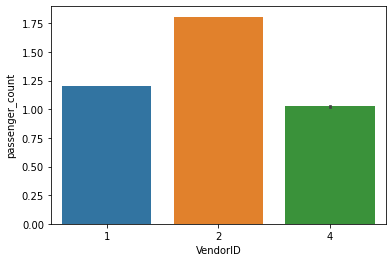

In [25]:
sns.barplot(x=pre_df['VendorID'], y=pre_df['passenger_count'])

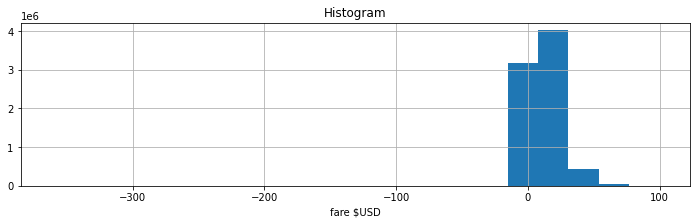

In [22]:
df[df.fare_amount<100].fare_amount.hist(bins=20, figsize=(12,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

In [27]:
vendor_mapping = {1:'Creative Mobile Technologies,LLC',2:'VeriFone Inc.',4:'Unknown Vendor'}
pre_df['VendorID']=pre_df['VendorID'].apply(lambda x: vendor_mapping[x])

In [28]:
ratecode_mapping = {1:'Standard rate',2:'JFK',3:'Newark',4:'Nassau or Westchester',5:'Negotiated fare',6:'Group ride',99:'Unknown Rates'}
pre_df['RatecodeID']=pre_df['RatecodeID'].apply(lambda x: ratecode_mapping[x])

In [29]:
payment_mapping = {1:'Credit card',2:'Cash',3:'No charge',4:'Dispute',5:'Unknown',6:'Voided trip'}
pre_df['payment_type']=pre_df['payment_type'].apply(lambda x: payment_mapping[x])

In [30]:
cols = ['VendorID','RatecodeID','payment_type']
pre_df[cols].sample(10,random_state=123)

,VendorID,RatecodeID,payment_type
3621723,VeriFone Inc.,Standard rate,Credit card
7197555,VeriFone Inc.,Standard rate,Credit card
6466265,VeriFone Inc.,Standard rate,Credit card
3648267,VeriFone Inc.,Standard rate,Credit card
7528800,VeriFone Inc.,Standard rate,Credit card
7065595,"Creative Mobile Technologies,LLC",Standard rate,Credit card
7046919,"Creative Mobile Technologies,LLC",Standard rate,Credit card
7493470,VeriFone Inc.,Standard rate,Cash
2533354,"Creative Mobile Technologies,LLC",Standard rate,Credit card
2847975,"Creative Mobile Technologies,LLC",Standard rate,Credit card


In [34]:
df_filter = df[(df.trip_distance>0) & (df.fare_amount>0) & (df.passenger_count>0)].copy()

In [36]:
df_filter['tpep_dropoff_datetime'] = pd.to_datetime(df_filter['tpep_dropoff_datetime'])
df_filter['tpep_pickup_datetime'] = pd.to_datetime(df_filter['tpep_pickup_datetime'])

In [37]:
df_filter['trip_duration'] = (df_filter['tpep_dropoff_datetime'] - df_filter['tpep_pickup_datetime']).astype('timedelta64[m]')

In [38]:
df_filter.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,6.0
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,19.0
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,7.0
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,13.0
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,12.0


In [39]:
df_filter['pickup_hour']=df_filter['tpep_pickup_datetime'].dt.hour
df_filter['dropoff_hour']=df_filter['tpep_dropoff_datetime'].dt.hour
df_filter.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,pickup_hour,dropoff_hour
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,6.0,0,0
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,19.0,0,1
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,7.0,0,0
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,13.0,0,0
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,12.0,0,1


In [40]:
def calculate_time_of_day(item):
    if item in range(6,12):
        return 'Morning'
    elif item in range(12,16):
        return 'Afternoon'
    elif item in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [41]:
df_filter['pickup_time_of_day'] = df_filter.pickup_hour.apply(lambda item: calculate_time_of_day(item))
df_filter['dropoff_time_of_day'] = df_filter.dropoff_hour.apply(lambda item: calculate_time_of_day(item))

In [42]:
df_hour_of_day = df_filter.groupby(['pickup_hour']).size().reset_index()
df_hour_of_day.columns = ['pickup_hour','total_passenger_count']
df_hour_of_day[17:23]

,pickup_hour,total_passenger_count
17,17,455052
18,18,502459
19,19,464183
20,20,413461
21,21,400554
22,22,360912


<AxesSubplot:xlabel='pickup_hour', ylabel='total_passenger_count'>

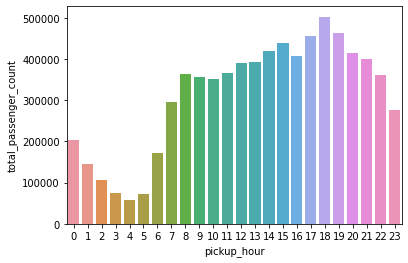

In [43]:
sns.barplot(x=df_hour_of_day['pickup_hour'], y=df_hour_of_day['total_passenger_count'])

In [44]:
from datetime import date
import calendar
my_date = df_filter['tpep_pickup_datetime']
my_date = my_date[0]
print(calendar.day_name[my_date.weekday()]) #'Wednesday'

Tuesday


In [47]:
df_filter['pickup_day'] = df_filter['tpep_pickup_datetime'].dt.weekday

In [48]:
weekday_mapping = {1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday',0:'Monday'}
df_filter['pickup_day']=df_filter['pickup_day'].apply(lambda x: weekday_mapping[x])

In [49]:
df_filter[:4]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,pickup_hour,dropoff_hour,pickup_time_of_day,dropoff_time_of_day,pickup_day
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,1.65,0.0,0.3,9.95,6.0,0,0,Late night,Late night,Tuesday
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,1.00,0.0,0.3,16.30,19.0,0,1,Late night,Late night,Tuesday
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,...,1.25,0.0,0.3,9.05,7.0,0,0,Late night,Late night,Tuesday
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,...,3.70,0.0,0.3,18.50,13.0,0,0,Late night,Late night,Tuesday


In [50]:
df_day_of_week = df_filter.groupby(['pickup_day']).size().reset_index()
df_day_of_week.columns = ['day','total_passenger_count']
df_day_of_week

,day,total_passenger_count
0,Friday,1057036
1,Monday,883029
2,Saturday,985506
3,Sunday,838378
4,Thursday,1320079
5,Tuesday,1175899
6,Wednesday,1230918


<AxesSubplot:xlabel='day', ylabel='total_passenger_count'>

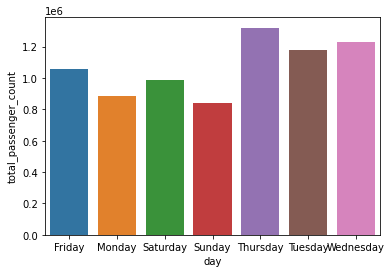

In [71]:
sns.barplot(x=df_day_of_week['day'], y=df_day_of_week['total_passenger_count'])

In [45]:
df_passenger = df_filter.groupby(['VendorID']).size().reset_index()
df_passenger.columns = ['VendorID','total_passenger_count']
df_passenger

,VendorID,total_passenger_count
0,1,2798342
1,2,4616122
2,4,76381


<AxesSubplot:xlabel='VendorID', ylabel='total_passenger_count'>

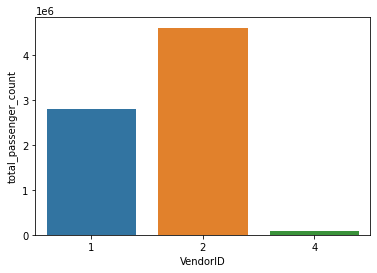

In [51]:
sns.barplot(x=df_passenger['VendorID'], y=df_passenger['total_passenger_count'])

<AxesSubplot:xlabel='day', ylabel='total_amount'>

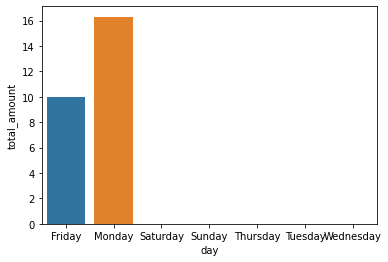

In [72]:
sns.barplot(x=df_day_of_week['day'], y=df_filter['total_amount'])

In [75]:
df_amount_per_day = df_filter.groupby(['total_amount']).size().reset_index()
df_amount_per_day.columns = ['day','total_passenger_count']
df_amount_per_day

,day,total_passenger_count
0,0.31,228
1,0.33,2
2,0.34,1
3,0.36,1
4,0.40,48
...,...,...
11414,845.15,1
11415,855.80,1
11416,3345.30,1
11417,6667.45,1


In [ ]:
#change is happening for 2-3 months pickup-- trends, hours of day, day of week, no rides changing wrt dates/days